In [2]:
import os
from imutils import paths
import random
from PIL import Image
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np

Two feature: image and annotation
Data structure:
{id}.png file in /CelebAMask-HQ folder
{id}_{anno_region}.png file in /CelebAMask-HQ-mask-anno folder

In [3]:
dataset_dir = '/cv_demo_fun_data/CelebAMask-HQ'
images_dir = Path(dataset_dir) / 'CelebA-HQ-img'
annotations_dir = Path(dataset_dir) / 'CelebAMask-HQ-mask-anno'
images_path = [x for x in paths.list_images(images_dir)]
annotations_path = [x for x in paths.list_images(annotations_dir)]

In [4]:
print(len(images_path))

30000


[INFO] Displaying a random image and its annotation...
10376
(1024, 1024)


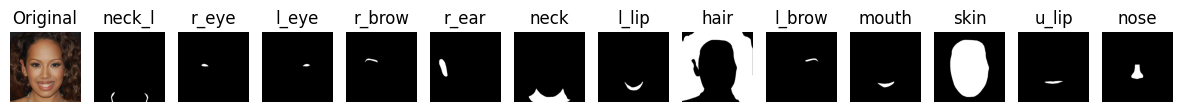

In [5]:
# Grab a random index of the training dataset
print("[INFO] Displaying a random image and its annotation...")
index = random.randint(0, len(images_path))
id = images_path[index].split(os.path.sep)[-1].split('.')[0]

def get_id(image_path):
    id = image_path.split(os.path.sep)[-1].split('.')[0]
    return id

def find_annotation_path(id):
    paths = []
    for path in annotations_path:
        if id in path:
            paths.append(path)
    return paths

def get_anno_attribute(anno_image_path):
    filename = anno_image_path.split(os.path.sep)[-1].split('.')[0]
    return '_'.join(filename.split('_')[1:])
    # return anno_image_path.split(os.path.sep)[-1].split('.')[0].replace(f'{id}_', '')
    
def list_anno_attributes(id):
    paths = find_annotation_path(id)
    return [get_anno_attribute(path) for path in paths]

print(id)
image = Image.open(images_path[index])
print(image.size)
annotation_images_path = find_annotation_path(id)

# Plot the original image and the annotations
plt.figure(figsize=(15, 5))
for plot_index in range(len(annotation_images_path)+1):
    if plot_index == 0:
        # If plot index is 0 display the original image
        plot_image = image
        title = "Original"
    else:
        # Else plot the annotation maps
        # plot_image = annotation[..., plot_index - 1]
        plot_image = Image.open(annotation_images_path[plot_index-1])
        # print(plot_image.size)
        title = get_anno_attribute(annotation_images_path[plot_index-1])
        # title = ["Class Map (R)", "Instance Map (G)"][plot_index - 1]

    # Plot the image
    plt.subplot(1, len(annotation_images_path)+1, plot_index + 1)
    plt.imshow(plot_image)
    plt.title(title)
    plt.axis("off")


In [6]:
labels = np.unique([get_anno_attribute(x) for x in annotations_path])
print(len(labels))
print(labels)

18
['cloth' 'ear_r' 'eye_g' 'hair' 'hat' 'l_brow' 'l_ear' 'l_eye' 'l_lip'
 'mouth' 'neck' 'neck_l' 'nose' 'r_brow' 'r_ear' 'r_eye' 'skin' 'u_lip']


In [36]:
# the larger id could cover the smaller id in label image
labels = [\
    'hair',
    'hat',
    'skin',
    'l_brow', # left eyebrow
    'r_brow', # right eyebrow
    'l_ear', # left ear
    'r_ear', # right ear
    'ear_r', # earing
    'l_eye', # left eye
    'r_eye', # right eye
    'eye_g', # eyeglass
    'nose',
    'u_lip', # upperlip
    'l_lip', # lowerlip
    'mouth',
    'cloth', 
    'neck',
    'neck_l', # necklace
]
label2id = {label: i+1 for i, label in enumerate(labels)}
id2label = {i+1: label for i, label in enumerate(labels)}
num_classes = len(labels)

hair


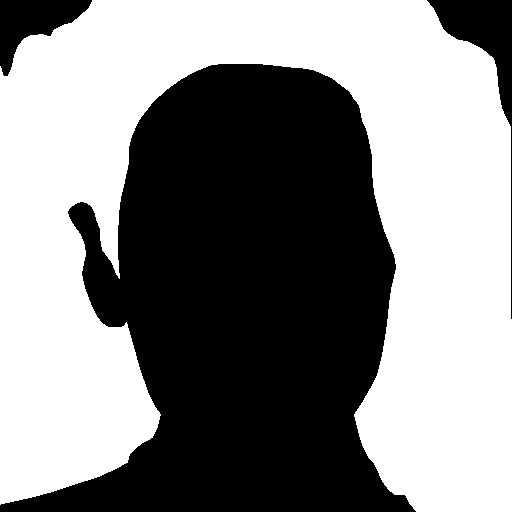

skin


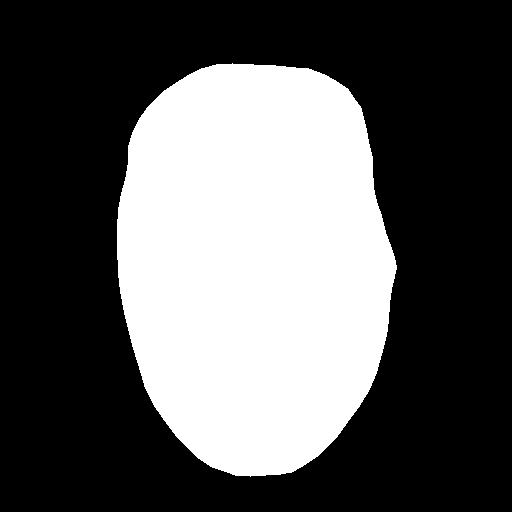

l_brow


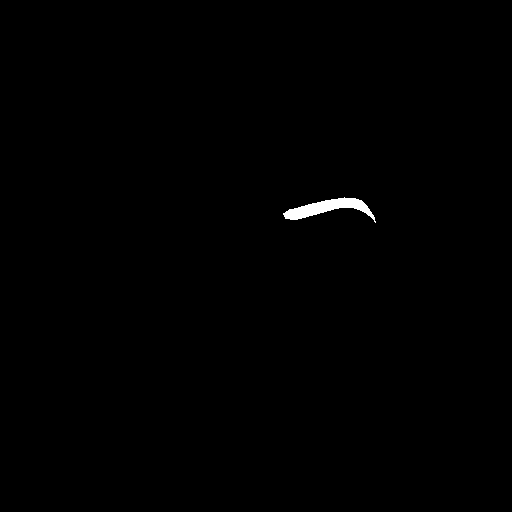

r_brow


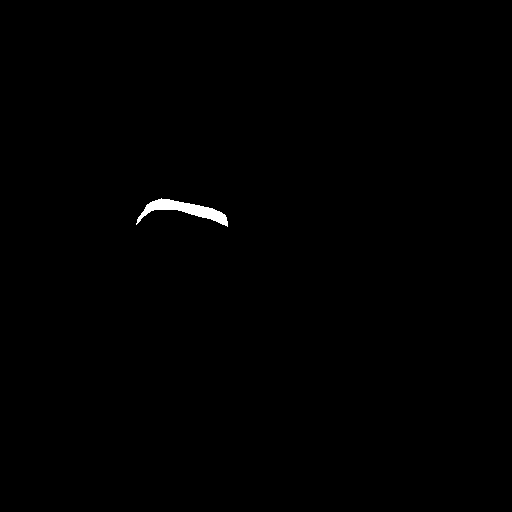

r_ear


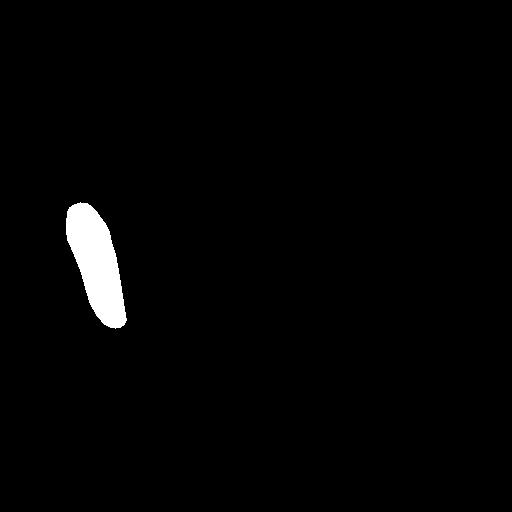

l_eye


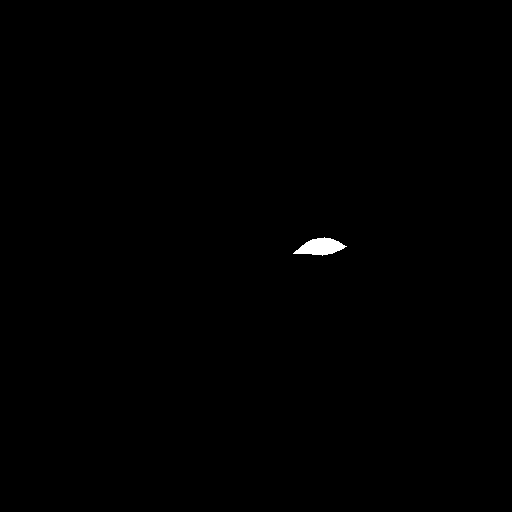

r_eye


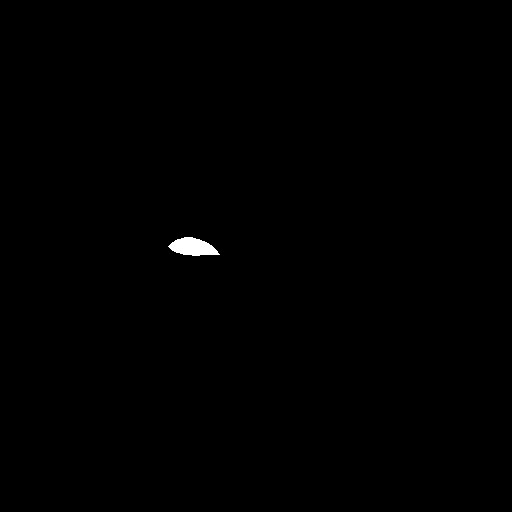

nose


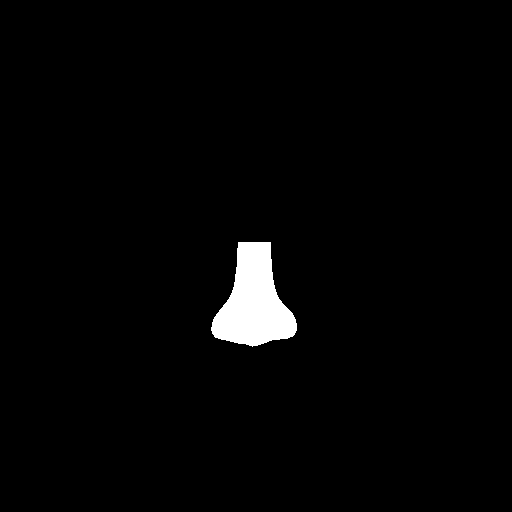

u_lip


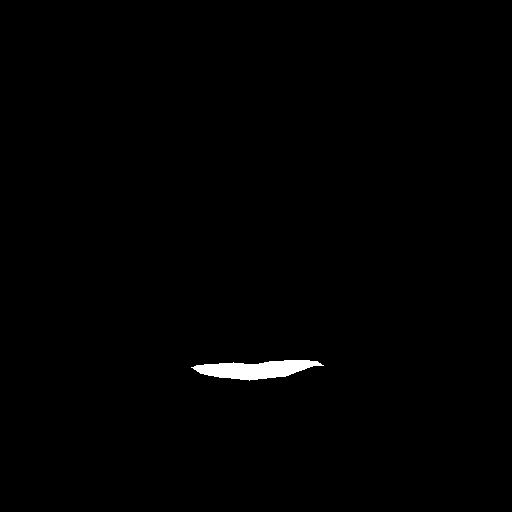

l_lip


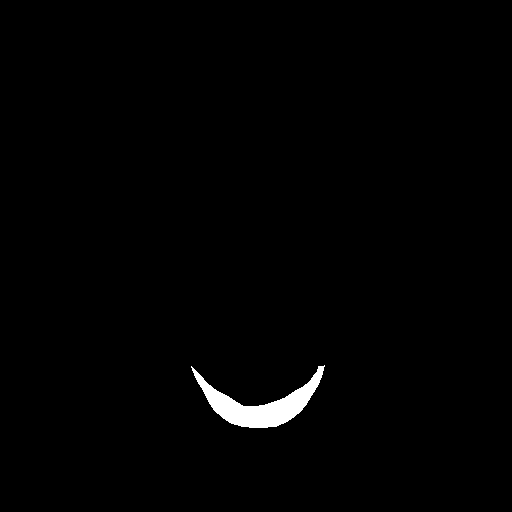

mouth


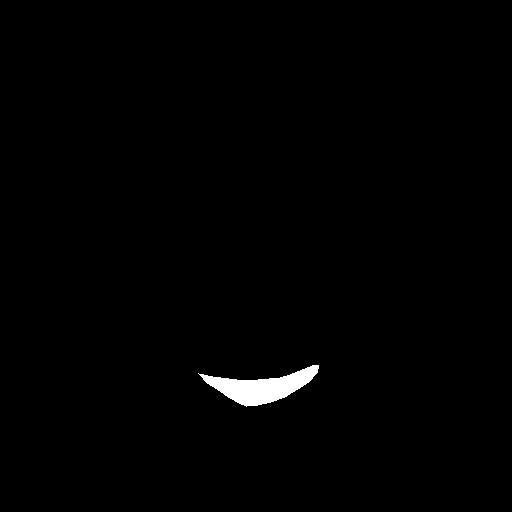

neck


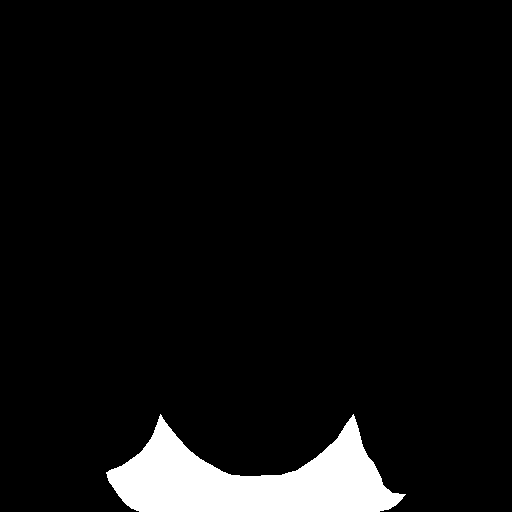

neck_l


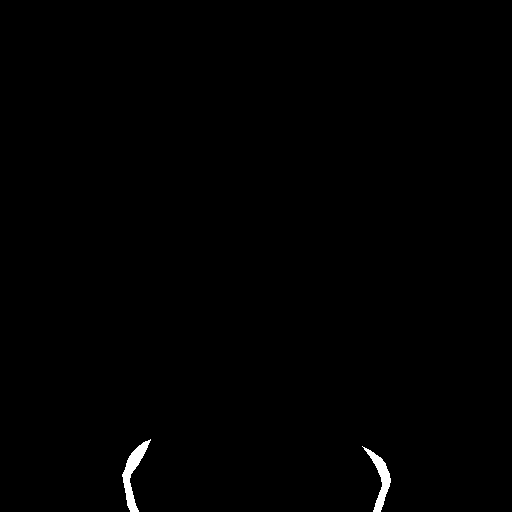

In [33]:
segmentation_map = np.zeros((512, 512), dtype=np.uint8)
annotation_images_path.sort(key=lambda x: label2id.get(get_anno_attribute(x)))
for path in annotation_images_path:
    attribute = get_anno_attribute(path)
    id = label2id[attribute]
    print(attribute)

    # open as single channel image
    anno = Image.open(path).convert('L')
    # set the non-zero values to 1
    anno = np.array(anno)
    Image.fromarray(anno).show()
    segmentation_map[anno > 0] = id

In [34]:
np.unique(segmentation_map)

array([ 0,  1,  3,  4,  5,  7,  9, 10, 12, 13, 14, 15, 16, 17],
      dtype=uint8)

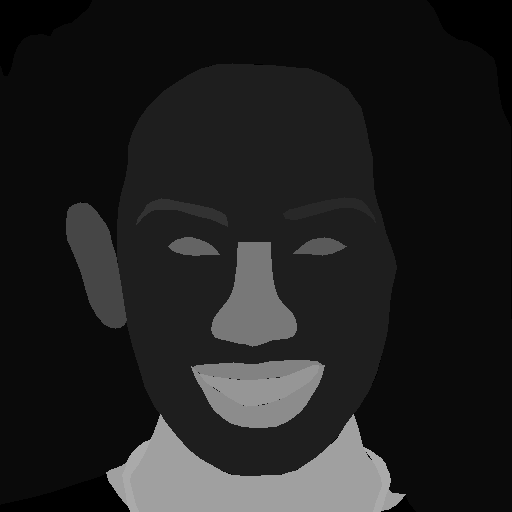

In [35]:
Image.fromarray(segmentation_map*10)

In [20]:
def color_palette():
    """Color palette that maps each class to RGB values.
    
    This one is actually taken from ADE20k.
    """
    return [[120, 120, 120], [180, 120, 120], [6, 230, 230], [80, 50, 50],
            [4, 200, 3], [120, 120, 80], [140, 140, 140], [204, 5, 255],
            [230, 230, 230], [4, 250, 7], [224, 5, 255], [235, 255, 7],
            [150, 5, 61], [120, 120, 70], [8, 255, 51], [255, 6, 82],
            [143, 255, 140], [204, 255, 4], [255, 51, 7], [204, 70, 3],
            [0, 102, 200], [61, 230, 250], [255, 6, 51], [11, 102, 255],
            [255, 7, 71], [255, 9, 224], [9, 7, 230], [220, 220, 220],
            [255, 9, 92], [112, 9, 255], [8, 255, 214], [7, 255, 224],
            [255, 184, 6], [10, 255, 71], [255, 41, 10], [7, 255, 255],
            [224, 255, 8], [102, 8, 255], [255, 61, 6], [255, 194, 7],
            [255, 122, 8], [0, 255, 20], [255, 8, 41], [255, 5, 153],
            [6, 51, 255], [235, 12, 255], [160, 150, 20], [0, 163, 255],
            [140, 140, 140], [250, 10, 15], [20, 255, 0], [31, 255, 0],
            [255, 31, 0], [255, 224, 0], [153, 255, 0], [0, 0, 255],
            [255, 71, 0], [0, 235, 255], [0, 173, 255], [31, 0, 255],
            [11, 200, 200], [255, 82, 0], [0, 255, 245], [0, 61, 255],
            [0, 255, 112], [0, 255, 133], [255, 0, 0], [255, 163, 0],
            [255, 102, 0], [194, 255, 0], [0, 143, 255], [51, 255, 0],
            [0, 82, 255], [0, 255, 41], [0, 255, 173], [10, 0, 255],
            [173, 255, 0], [0, 255, 153], [255, 92, 0], [255, 0, 255],
            [255, 0, 245], [255, 0, 102], [255, 173, 0], [255, 0, 20],
            [255, 184, 184], [0, 31, 255], [0, 255, 61], [0, 71, 255],
            [255, 0, 204], [0, 255, 194], [0, 255, 82], [0, 10, 255],
            [0, 112, 255], [51, 0, 255], [0, 194, 255], [0, 122, 255],
            [0, 255, 163], [255, 153, 0], [0, 255, 10], [255, 112, 0],
            [143, 255, 0], [82, 0, 255], [163, 255, 0], [255, 235, 0],
            [8, 184, 170], [133, 0, 255], [0, 255, 92], [184, 0, 255],
            [255, 0, 31], [0, 184, 255], [0, 214, 255], [255, 0, 112],
            [92, 255, 0], [0, 224, 255], [112, 224, 255], [70, 184, 160],
            [163, 0, 255], [153, 0, 255], [71, 255, 0], [255, 0, 163],
            [255, 204, 0], [255, 0, 143], [0, 255, 235], [133, 255, 0],
            [255, 0, 235], [245, 0, 255], [255, 0, 122], [255, 245, 0],
            [10, 190, 212], [214, 255, 0], [0, 204, 255], [20, 0, 255],
            [255, 255, 0], [0, 153, 255], [0, 41, 255], [0, 255, 204],
            [41, 0, 255], [41, 255, 0], [173, 0, 255], [0, 245, 255],
            [71, 0, 255], [122, 0, 255], [0, 255, 184], [0, 92, 255],
            [184, 255, 0], [0, 133, 255], [255, 214, 0], [25, 194, 194],
            [102, 255, 0], [92, 0, 255]]

palette = color_palette()

import numpy as np
import matplotlib.pyplot as plt

color_segmentation_map = np.zeros((segmentation_map.shape[0], segmentation_map.shape[1], 3), dtype=np.uint8) # height, width, 3
for label, color in enumerate(palette):
    color_segmentation_map[segmentation_map == label, :] = color
# Convert to BGR
ground_truth_color_seg = color_segmentation_map[..., ::-1]

img = np.array(image.resize((512, 512))) * 0.5 + ground_truth_color_seg * 0.5
img = img.astype(np.uint8)

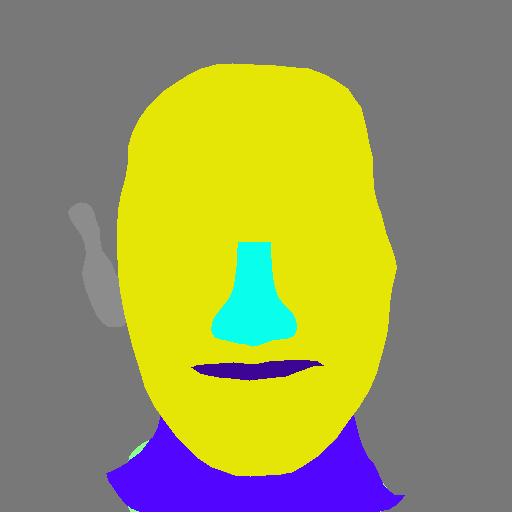

In [21]:
Image.fromarray(ground_truth_color_seg)

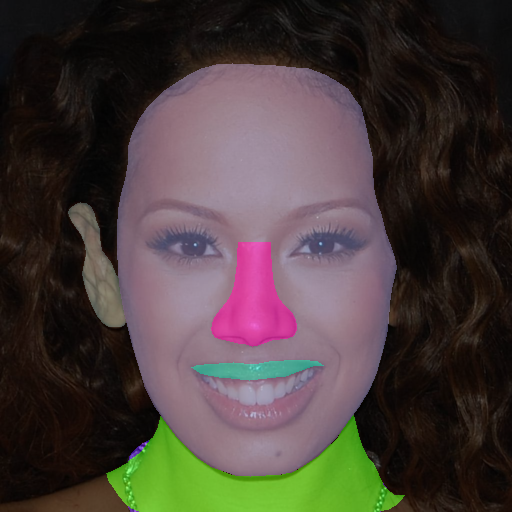

In [15]:
Image.fromarray(img)